In [2]:
import pandas as pd

In [4]:
from sklearn.datasets import fetch_openml

In [10]:
boston = fetch_openml(name='boston', version=2)

# 데이터프레임으로 변환
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.Series(boston.target, name='MEDV')

# 데이터 확인
print(dfX.head())
print(dfy.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
0    N
1    P
2    N
3    N
4    N
Name: MEDV, dtype: category
Categories (2, object): ['N', 'P']


c:\Users\박랑희\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [11]:
df = pd.concat([dfX, dfy], axis=1)

In [17]:
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [20]:
# 한글 시각화
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\1815345036.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=False, norm_hist=True)


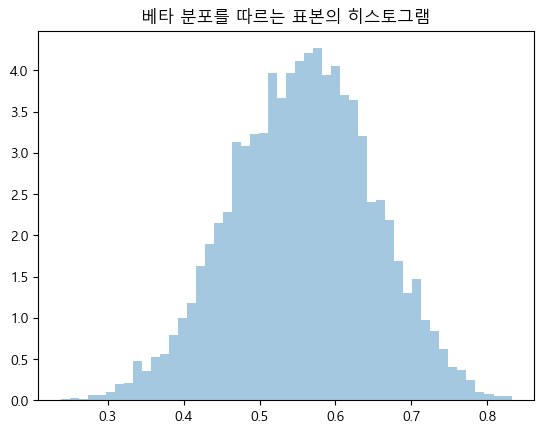

In [21]:
np.random.seed(0)
x = sp.stats.beta(15, 12).rvs(10000)

sns.distplot(x, kde=False, norm_hist=True)
plt.title("베타 분포를 따르는 표본의 히스토그램")
plt.show()

In [22]:
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) / s2 - 1)
    return a, b


params = estimate_beta(x)
print(params)

(15.346682046700685, 12.2121537049535)


C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\488760351.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=False, norm_hist=True)


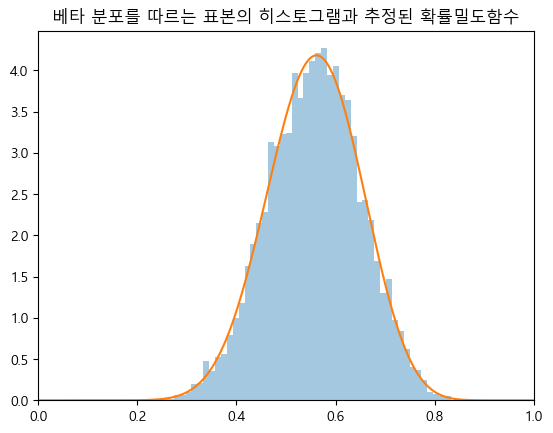

In [23]:
xx = np.linspace(0, 1, 1000)
sns.distplot(x, kde=False, norm_hist=True)
plt.plot(xx, sp.stats.beta(params[0], params[1]).pdf(xx))
plt.xlim(0, 1)
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()

C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\2875638292.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=False, norm_hist=True, fit=sp.stats.beta)


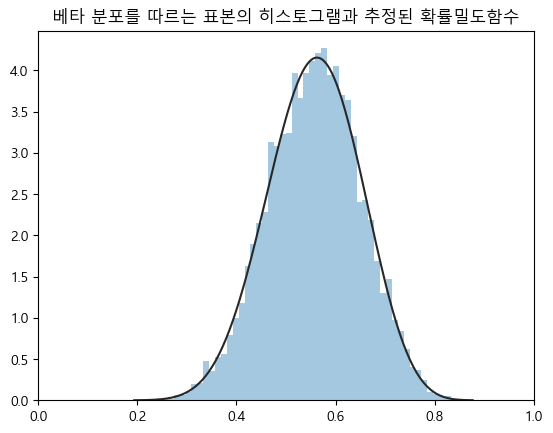

In [24]:
sns.distplot(x, kde=False, norm_hist=True, fit=sp.stats.beta)
plt.xlim(0, 1)
plt.title("베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수")
plt.show()

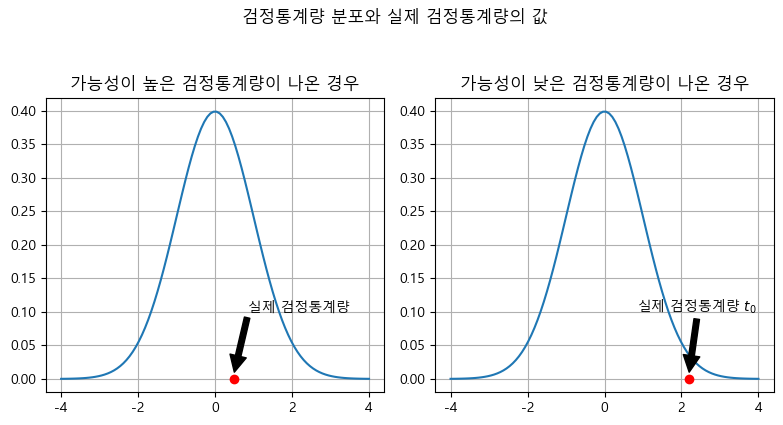

In [28]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("가능성이 높은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.grid()
plt.annotate('실제 검정통계량', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("가능성이 낮은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.grid()
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량의 값", y=1.05)
plt.tight_layout()
plt.show()

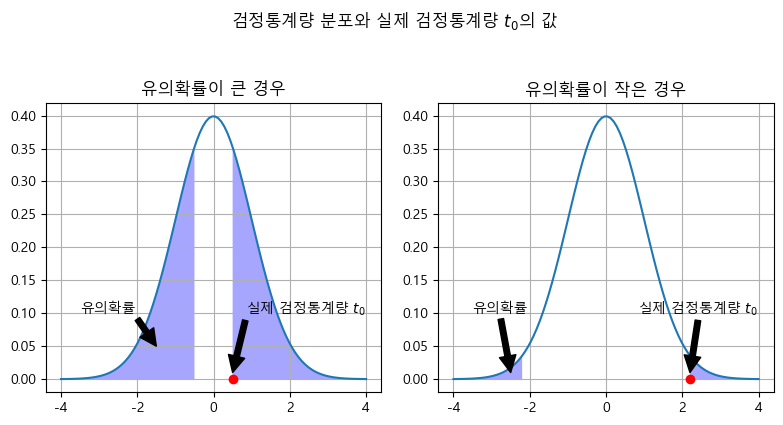

In [30]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("유의확률이 큰 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -0.5, 100)
xx3 = np.linspace(0.5, 4, 100)
plt.grid()
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-1.5, 0.05), xytext=(-3.5, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("유의확률이 작은 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -2.2, 100)
xx3 = np.linspace(2.2, 4, 100)
plt.grid()
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-2.5, 0.01), xytext=(-3.5, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량 $t_0$의 값", y=1.05)
plt.tight_layout()
plt.show()

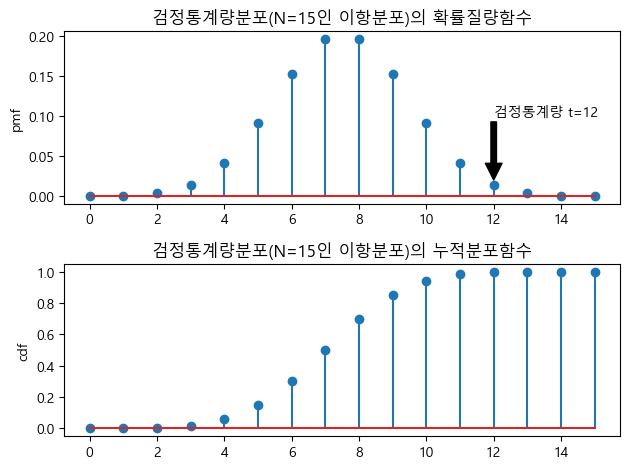

In [35]:
N = 15
mu = 0.5
rv = sp.stats.binom(N, mu)

xx = np.arange(N + 1)

plt.subplot(211)
plt.stem(xx, rv.pmf(xx))
plt.ylabel("pmf")
plt.title("검정통계량분포(N=15인 이항분포)의 확률질량함수")
black = {"facecolor": "black"}
plt.annotate('검정통계량 t=12', xy=(12, 0.02), xytext=(12, 0.1), arrowprops=black)

plt.subplot(212)
plt.stem(xx, rv.cdf(xx))
plt.ylabel("cdf")
plt.title("검정통계량분포(N=15인 이항분포)의 누적분포함수")

plt.tight_layout()
plt.show()

In [36]:
2 * (1 - rv.cdf(12 - 1))

0.03515625

In [37]:
1 - rv.cdf(12 - 1)

0.017578125

In [38]:
x = np.array([-0.025, -0.05, 0.043, -0.037, -0.056])
t = x.mean()/x.std(ddof=1)*np.sqrt(len(x))
t

-1.4025921414082105

In [39]:
sp.stats.t(df=4).cdf(t)

0.11669216509589829

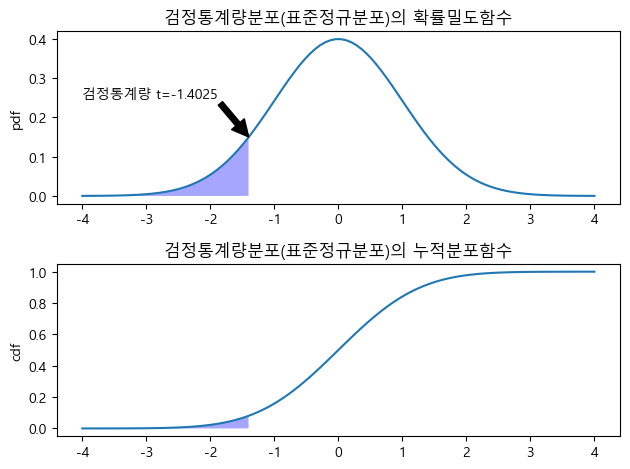

In [40]:
rv = sp.stats.norm()

xx = np.linspace(-4, 4, 100)

plt.subplot(211)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("pdf")
plt.title("검정통계량분포(표준정규분포)의 확률밀도함수")
black = {"facecolor": "black"}
plt.annotate('검정통계량 t=-1.4025', xy=(-1.4, 0.15), xytext=(-4, 0.25), arrowprops=black)
xx2 = np.linspace(-4, -1.4025, 100)
plt.fill_between(xx2, rv.pdf(xx2), facecolor='blue', alpha=0.35)

plt.subplot(212)
plt.plot(xx, rv.cdf(xx))
plt.fill_between(xx2, rv.cdf(xx2), facecolor='blue', alpha=0.35)
plt.ylabel("cdf")
plt.title("검정통계량분포(표준정규분포)의 누적분포함수")

plt.tight_layout()
plt.show()

In [42]:
N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [43]:
sp.stats.binom_test(n, N)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\84075228.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  sp.stats.binom_test(n, N)


0.34375

In [44]:
N = 100
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [45]:
sp.stats.binom_test(n, N)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\84075228.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  sp.stats.binom_test(n, N)


0.9204107626128211

In [46]:
N = 100
mu_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [47]:
sp.stats.binom_test(n, N)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\84075228.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  sp.stats.binom_test(n, N)


0.00018314322488235366

In [48]:
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [49]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [50]:
N = 100
K = 4
mu_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11], dtype=int64)

In [51]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

In [52]:
obs = np.array([[5, 15], [10, 20]])
sp.stats.chi2_contingency(obs)

Chi2ContingencyResult(statistic=0.0992063492063492, pvalue=0.7527841326498471, dof=1, expected_freq=array([[ 6., 14.],
       [ 9., 21.]]))

In [53]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [54]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

In [55]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
ztest_1samp(x)

(0.5980801553448499, 0.5497864508624168)

In [56]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

TtestResult(statistic=2.28943967238967, pvalue=0.04781846490857058, df=9)

In [57]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

TtestResult(statistic=0.5904283402851698, pvalue=0.5562489158694675, df=99)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\3139461946.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\3139461946.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kde

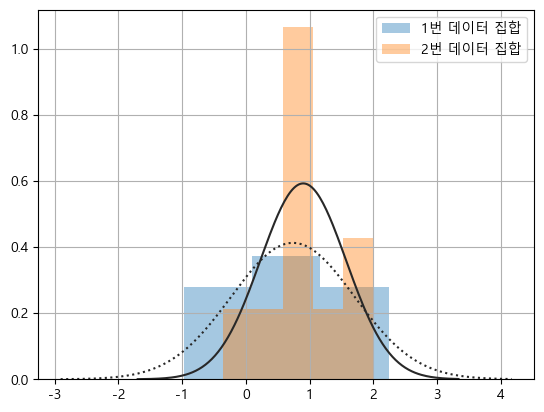

In [59]:
N_1 = 10
mu_1 = 0
sigma_1 = 1
N_2 = 10
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.grid()
plt.show()

In [60]:
np.mean(x1), np.mean(x2)

(0.7380231707288347, 0.9006460151624349)

In [61]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

TtestResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326, df=16.06633459779864)

In [62]:
N_1 = 50
mu_1 = 0
sigma_1 = 1
N_2 = 100
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
sp.stats.ttest_ind(x1, x2, equal_var=True)

TtestResult(statistic=-2.6826951236616963, pvalue=0.008133970915722658, df=148.0)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\2436861509.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\2436861509.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kde=F

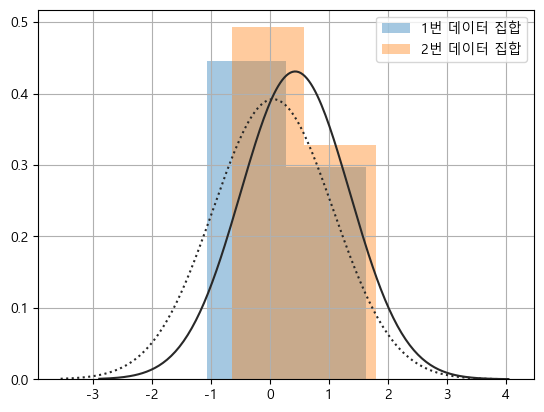

In [63]:
N = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.grid()
plt.show()

In [64]:
sp.stats.ttest_rel(x1, x2)

TtestResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305, df=4)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\3222799874.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\3222799874.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kde=F

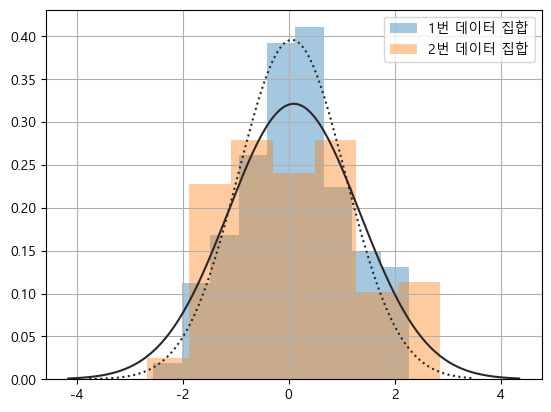

In [65]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.grid()
plt.show()

In [66]:
x1.std(), x2.std()

(1.0078822447165796, 1.2416003969261071)

In [67]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [68]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [69]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.006113515497020576)

C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\3915499274.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
C:\Users\박랑희\AppData\Local\Temp\ipykernel_141072\3915499274.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kde=F

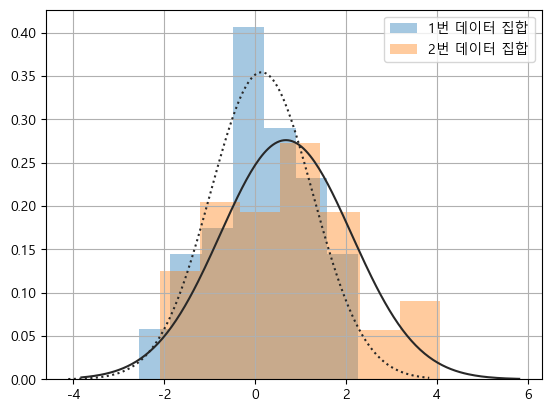

In [70]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.grid()
plt.show()

In [71]:
sp.stats.ks_2samp(x1, x2)

KstestResult(statistic=0.23, pvalue=0.05550723364321592, statistic_location=0.44386323274542566, statistic_sign=1)